In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import statsmodels.api as sm

In [36]:
df=pd.read_csv('house-price-parquet.csv')

In [37]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [38]:
col=df.columns
print(col)

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [39]:
# numerical columns and categorical columns
numerical_col=df.select_dtypes(include=['number']).columns

categorical_col=df.select_dtypes(include=['object', 'category']).columns

print(numerical_col)
print(categorical_col)

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')
Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [40]:
for i in categorical_col:
    print(i,"-" ,df[i].unique())

mainroad - ['yes' 'no']
guestroom - ['no' 'yes']
basement - ['no' 'yes']
hotwaterheating - ['no' 'yes']
airconditioning - ['yes' 'no']
prefarea - ['yes' 'no']
furnishingstatus - ['furnished' 'semi-furnished' 'unfurnished']


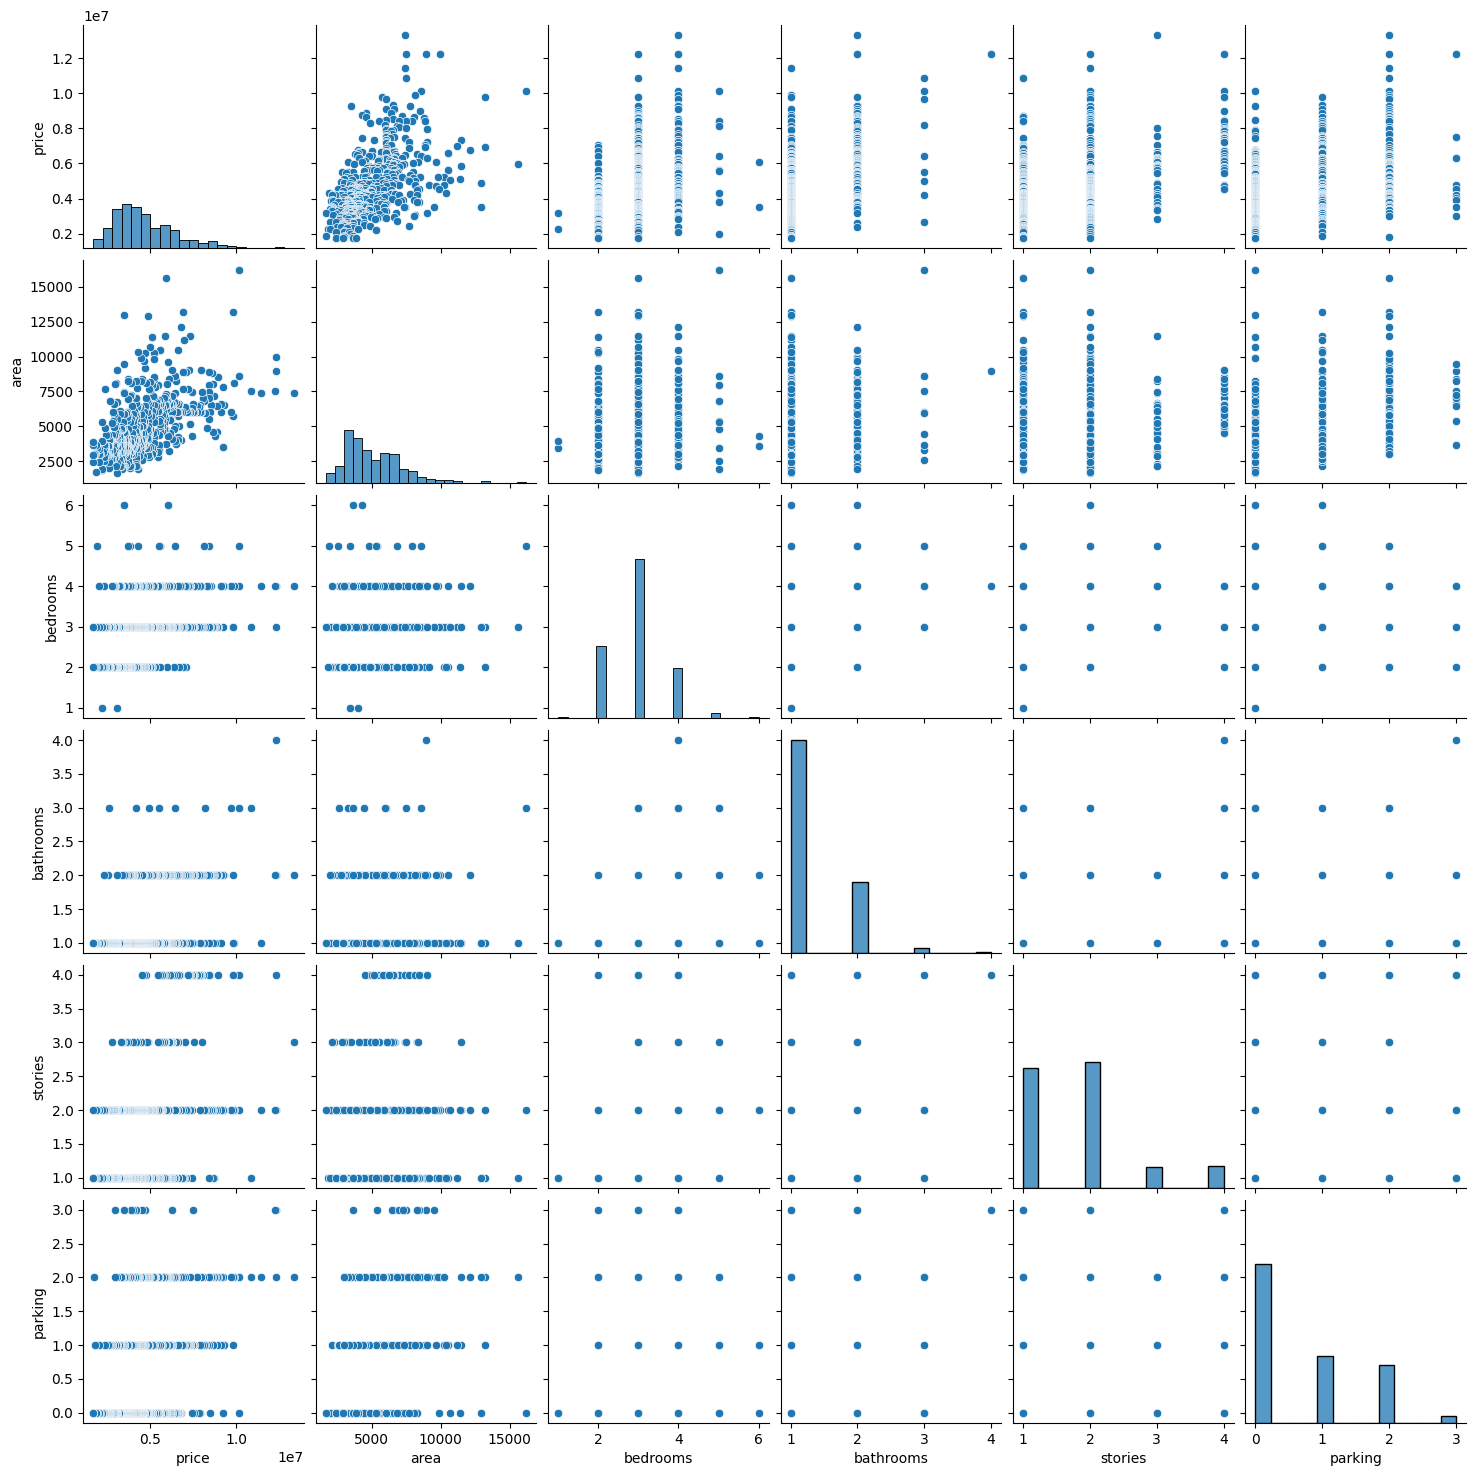

In [41]:
## to see the  pair plot of numerical columns
sns.pairplot(df[numerical_col])
plt.show()

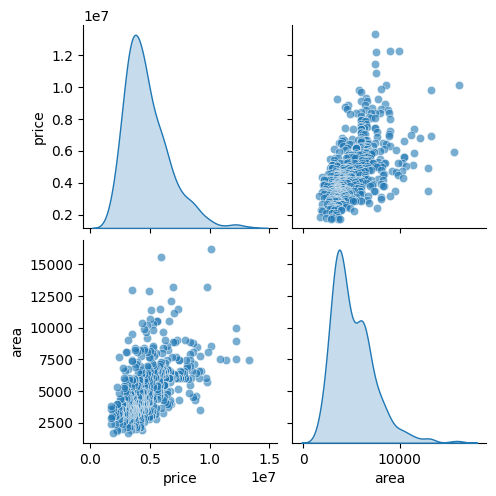

In [42]:
# from the  plot can see that only two columns are continious ,analysis
continuous_cols = ['price', 'area']

sns.pairplot(
    df[continuous_cols],
    diag_kind='kde',
    plot_kws={'alpha': 0.6}
)
plt.show()

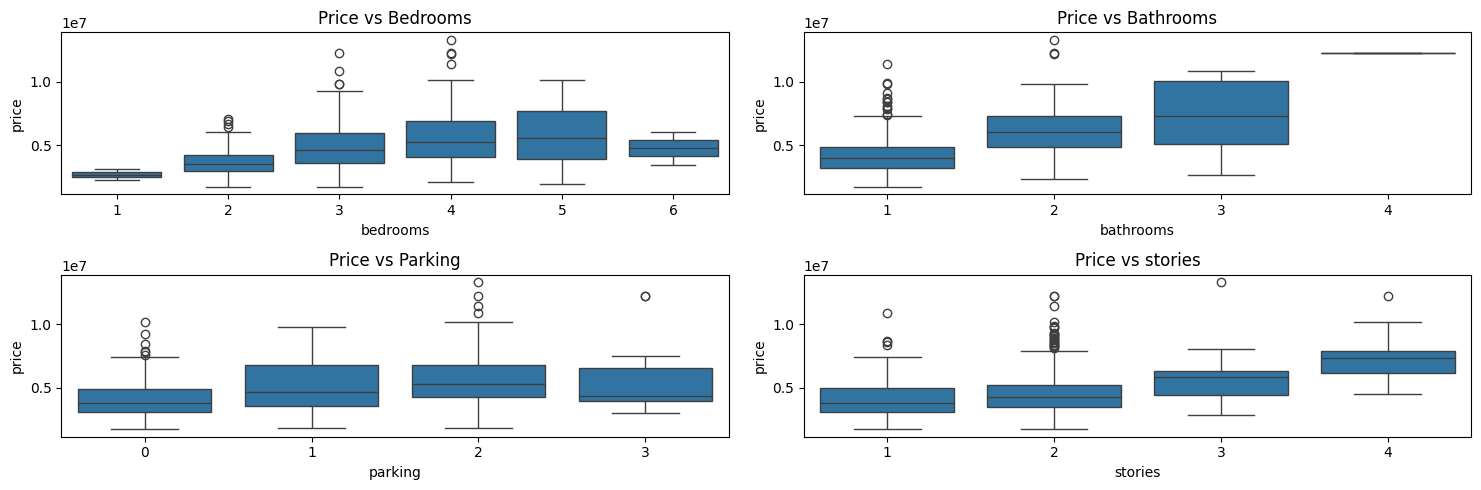

In [43]:
fig, ax = plt.subplots(2, 2, figsize=(15, 5))

sns.boxplot(data=df, x='bedrooms', y='price', ax=ax[0,0])
ax[0,0].set_title('Price vs Bedrooms')

sns.boxplot(data=df, x='bathrooms', y='price', ax=ax[0,1])
ax[0,1].set_title('Price vs Bathrooms')

sns.boxplot(data=df, x='parking', y='price', ax=ax[1,0])
ax[1,0].set_title('Price vs Parking')

sns.boxplot(data=df, x='stories', y='price', ax=ax[1,1])
ax[1,1].set_title('Price vs stories')

plt.tight_layout()
plt.show()

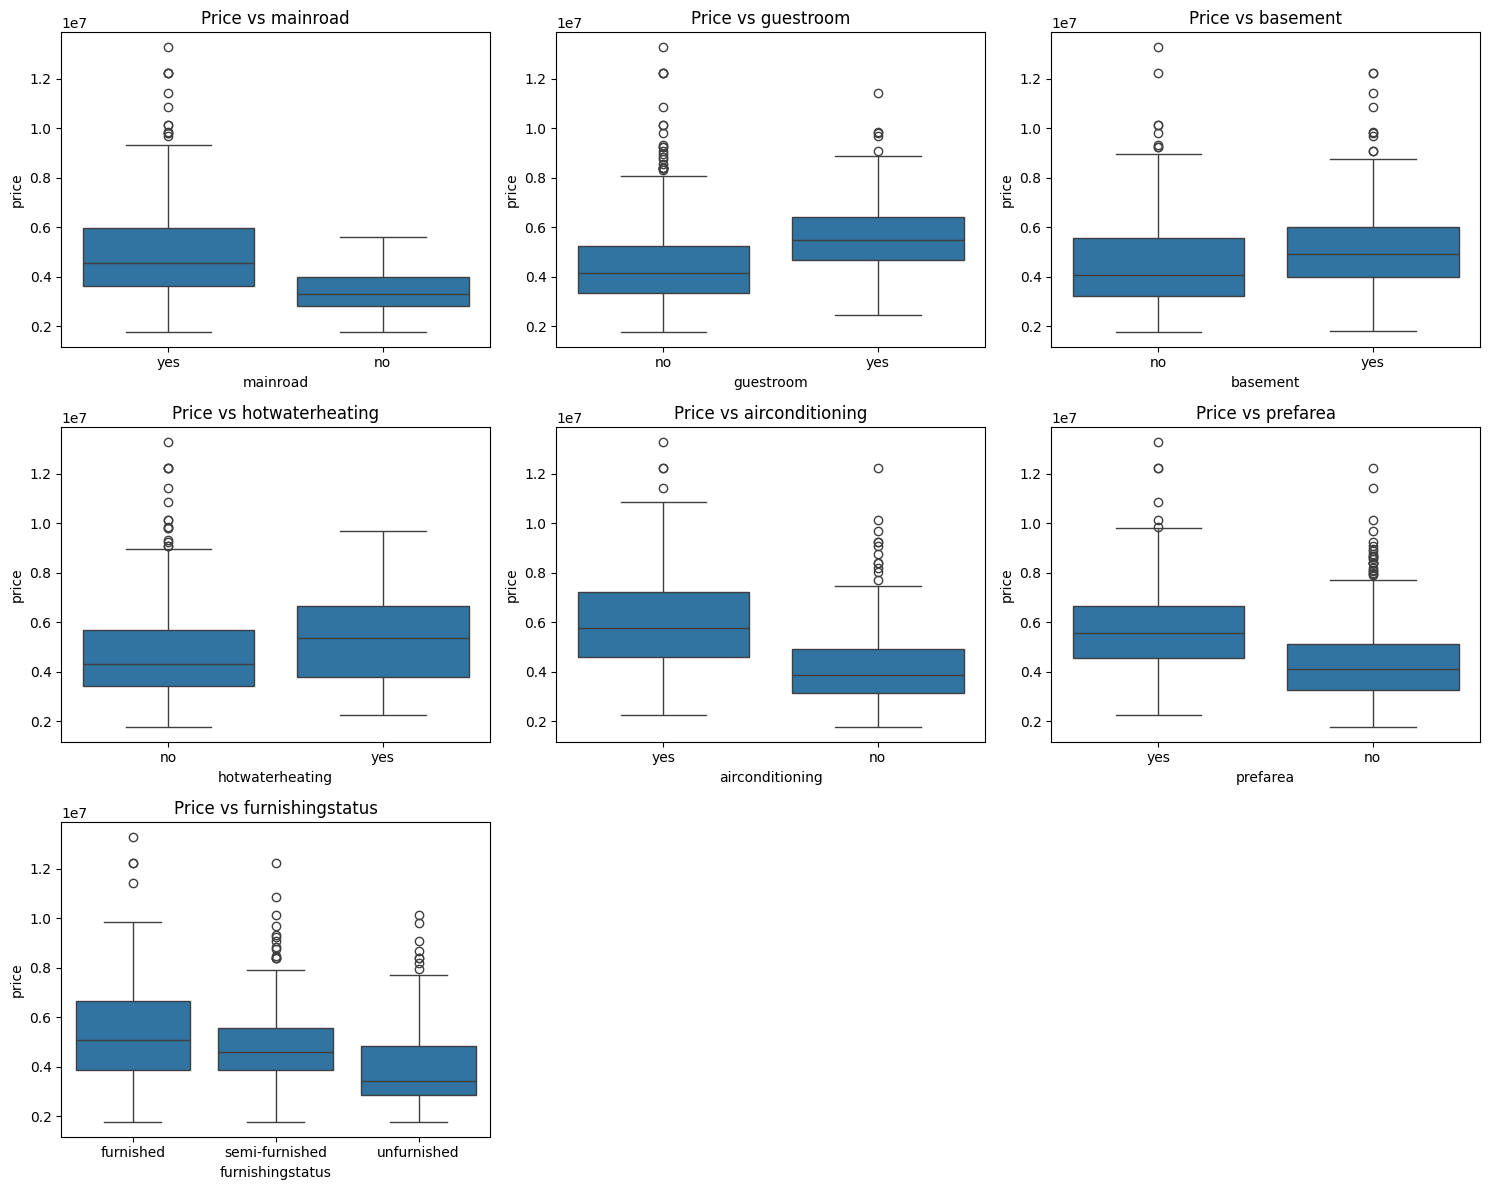

In [44]:

cat_cols =categorical_col
plt.figure(figsize=(15, 12))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, x=col, y='price')
    plt.title(f'Price vs {col}')

plt.tight_layout()
plt.show()


## Data preprocessing

In [45]:
from sklearn.preprocessing import OneHotEncoder


# Initialize encoder
ohe = OneHotEncoder(
    drop='first',          # avoids dummy variable trap
    sparse_output=False
)

# Fit & transform
encoded_array = ohe.fit_transform(df[cat_cols])

# Get feature names
encoded_cols = ohe.get_feature_names_out(cat_cols)

# Convert to DataFrame
encoded_df = pd.DataFrame(
    encoded_array,
    columns=encoded_cols,
    index=df.index
)

# Combine with numerical variables
df_final = pd.concat(
    [df.drop(columns=cat_cols), encoded_df],
    axis=1
)


In [46]:
df_final


,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,12250000,8960,4,4,4,3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,12250000,9960,3,2,2,2,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,12215000,7500,4,2,2,3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,11410000,7420,4,1,2,2,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
541,1767150,2400,3,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
542,1750000,3620,2,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
543,1750000,2910,3,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [48]:
# -------------------------------
# 1. Separate X and y
# -------------------------------
X = df_final.drop(columns='price')
y = df_final['price']

# -------------------------------
# 2. Train-test split
# -------------------------------
x_train, x_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(436, 13)
(109, 13)
(436,)
(109,)


In [49]:

lr = LinearRegression()
lr.fit(x_train,y_train)

# pridiction on the data
y_pred=lr.predict(x_test)
from sklearn.metrics import r2_score, mean_squared_error

print("multiple linear regression without any transformations")
print("r2_score", r2_score(y_test,y_pred))
print("mean_squared_error", mean_squared_error(y_test,y_pred))

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("root mean square_ error",rmse)

multiple linear regression without any transformations
r2_score 0.6529242642153184
mean_squared_error 1754318687330.6643
root mean square_ error 1324506.9600914388


In [50]:
# -------------------------------
# 3. Log-transform target (Y)
# -------------------------------
y_train_log = np.log(y_train)
y_test_log  = np.log(y_test)

# -------------------------------
# 4. Log-transform area (X)
# -------------------------------
X_train_log = x_train.copy()
X_test_log  = x_test.copy()

X_train_log['area'] = np.log(X_train_log['area'])
X_test_log['area']  = np.log(X_test_log['area'])

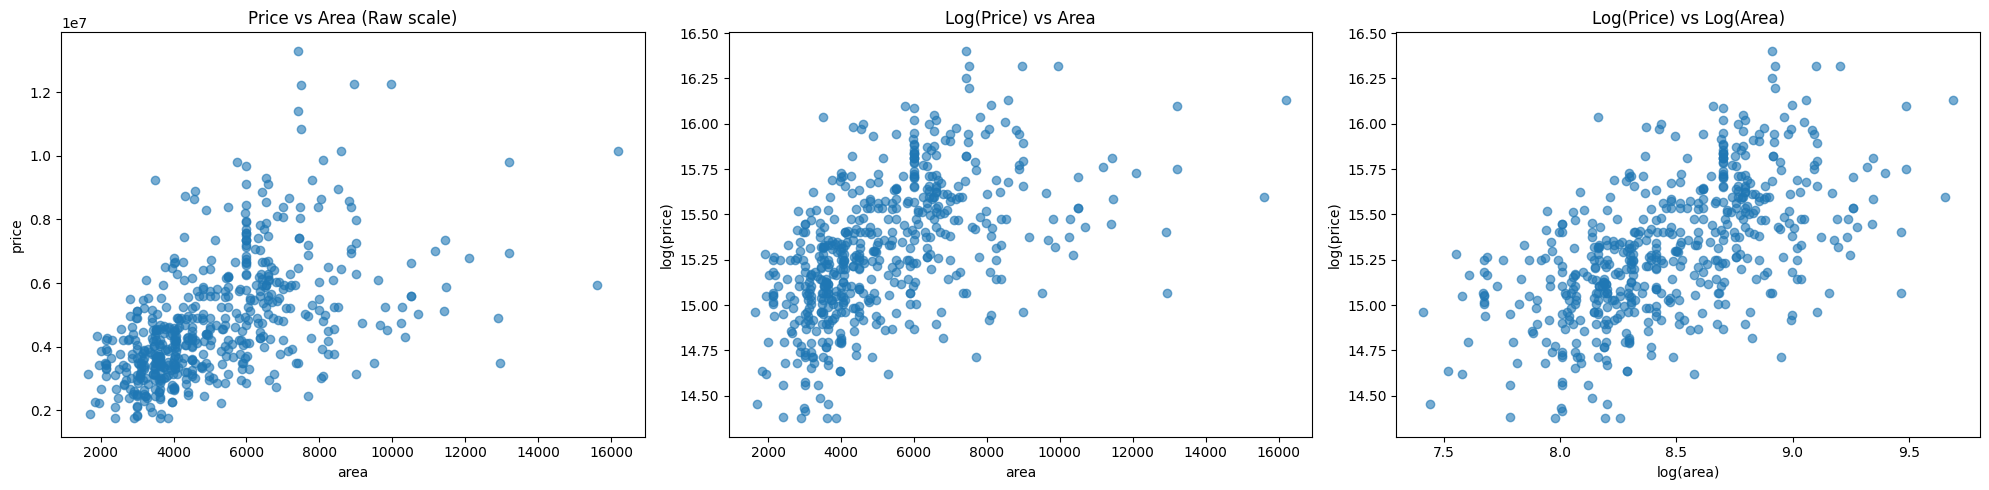

In [51]:
# checking  for log transformation of Price and Area
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

# 1. Raw scale
ax[0].scatter(df["area"], df["price"], alpha=0.6)
ax[0].set_xlabel("area")
ax[0].set_ylabel("price")
ax[0].set_title("Price vs Area (Raw scale)")

# 2. Semi-log: log(price) vs area
ax[1].scatter(df["area"], np.log(df["price"]), alpha=0.6)
ax[1].set_xlabel("area")
ax[1].set_ylabel("log(price)")
ax[1].set_title("Log(Price) vs Area")

# 3. Log–log: log(price) vs log(area)
ax[2].scatter(np.log(df["area"]), np.log(df["price"]), alpha=0.6)
ax[2].set_xlabel("log(area)")
ax[2].set_ylabel("log(price)")
ax[2].set_title("Log(Price) vs Log(Area)")

plt.tight_layout()
plt.show()


In [52]:


# -------------------------------
# 5. Fit Linear Regression
# -------------------------------
model1= LinearRegression()
model1.fit(X_train_log, y_train_log)

# -------------------------------
# 6. Predict on test set (log-scale)
# -------------------------------
y_pred_log = model1.predict(X_test_log)

# -------------------------------
# 7. Evaluation on LOG scale
# -------------------------------
r2_log = r2_score(y_test_log, y_pred_log)
mse_log = mean_squared_error(y_test_log, y_pred_log)
print("both price and area transformed")
print("Log-scale R²:", r2_log)
print("Log-scale MSE:", mse_log)

# -------------------------------
# 8. Back-transform predictions
# -------------------------------
y_pred = np.exp(y_pred_log)

# -------------------------------
# 9. Evaluation on ORIGINAL scale
# -------------------------------
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("MSE (original scale):", mse)
print("RMSE (original scale):", rmse)

# -------------------------------
# 10. Bias correction (recommended)
# -------------------------------
train_residuals = y_train_log - model1.predict(X_train_log)
sigma2 = train_residuals.var()

y_pred_bc = np.exp(y_pred_log + 0.5 * sigma2)

rmse_bc = np.sqrt(mean_squared_error(y_test, y_pred_bc))
print("Bias-corrected RMSE:", rmse_bc)

# -------------------------------
# 11. Coefficient table
# -------------------------------
coef_df = pd.DataFrame({
    "Feature": X_train_log.columns,
    "Coefficient": model1.coef_
}).sort_values(by="Coefficient", ascending=False)

print(coef_df)


both price and area transformed
Log-scale R²: 0.678234133449721
Log-scale MSE: 0.06212936343503206
MSE (original scale): 1725761218450.487
RMSE (original scale): 1313682.3126047207
Bias-corrected RMSE: 1296575.6656309797
                            Feature  Coefficient
0                              area     0.296111
2                         bathrooms     0.184870
9               airconditioning_yes     0.145644
10                     prefarea_yes     0.133231
8               hotwaterheating_yes     0.131849
7                      basement_yes     0.104124
5                      mainroad_yes     0.088883
3                           stories     0.082688
6                     guestroom_yes     0.036192
4                           parking     0.033112
1                          bedrooms     0.020366
11  furnishingstatus_semi-furnished    -0.005024
12     furnishingstatus_unfurnished    -0.114760


In [53]:

# -------------------------------------
# 4. Fit Linear Regression model
# -------------------------------------
model2 = LinearRegression()
model2.fit(x_train, y_train_log)

# -------------------------------------
# 5. Predict on test set (log scale)
# -------------------------------------
y_pred_log = model2.predict(x_test)

# -------------------------------------
# 6. Evaluate on LOG scale
# -------------------------------------
r2_log = r2_score(y_test_log, y_pred_log)
mse_log = mean_squared_error(y_test_log, y_pred_log)
print("only price  transform")
print("Log-scale R²:", r2_log)
print("Log-scale MSE:", mse_log)

# -------------------------------------
# 7. Back-transform predictions
# -------------------------------------
y_pred = np.exp(y_pred_log)

# -------------------------------------
# 8. Evaluate on ORIGINAL scale
# -------------------------------------
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("MSE (original scale):", mse)
print("RMSE (original scale):", rmse)

# -------------------------------------
# 9. Bias correction (SAFE VERSION)
# -------------------------------------
train_residuals = y_train_log - model2.predict(x_train)
sigma2 = train_residuals.var()

# clip exponent to avoid overflow
max_exp = 700
safe_exp = np.clip(y_pred_log + 0.5 * sigma2, a_min=None, a_max=max_exp)

y_pred_bc = np.exp(safe_exp)

rmse_bc = np.sqrt(mean_squared_error(y_test, y_pred_bc))
print("Bias-corrected RMSE:", rmse_bc)

# -------------------------------------
# 10. Diagnostics (optional but useful)
# -------------------------------------
print("Max y_pred_log:", y_pred_log.max())
print("Sigma^2:", sigma2)
print("Max exponent used:", safe_exp.max())

# -------------------------------------
# 11. Coefficient table
# -------------------------------------
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model2.coef_
}).sort_values(by="Coefficient", ascending=False)

print(coef_df)

only price  transform
Log-scale R²: 0.6722047299637582
Log-scale MSE: 0.06329357331376168
MSE (original scale): 1728299885729.0596
RMSE (original scale): 1314648.1984656807
Bias-corrected RMSE: 1295577.7764842578
Max y_pred_log: 16.247643998212993
Sigma^2: 0.03690956436310618
Max exponent used: 16.266098780394547
                            Feature  Coefficient
2                         bathrooms     0.186955
9               airconditioning_yes     0.157919
8               hotwaterheating_yes     0.130089
10                     prefarea_yes     0.125728
5                      mainroad_yes     0.111925
7                      basement_yes     0.099003
3                           stories     0.082593
6                     guestroom_yes     0.053951
4                           parking     0.036906
1                          bedrooms     0.020279
11  furnishingstatus_semi-furnished     0.001132
0                              area     0.000048
12     furnishingstatus_unfurnished    -0.109355

Comparing the two specifications, the log–log model outperformed the log-Y-only model in terms of log-scale R² and RMSE on the original scale. Furthermore, the log–log specification allows interpretation of the area coefficient as an elasticity, making it both statistically and economically preferable.”

/tmp/ipython-input-2811621754.py:46: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for grp, d in df_plot.groupby('bedroom_grp'):


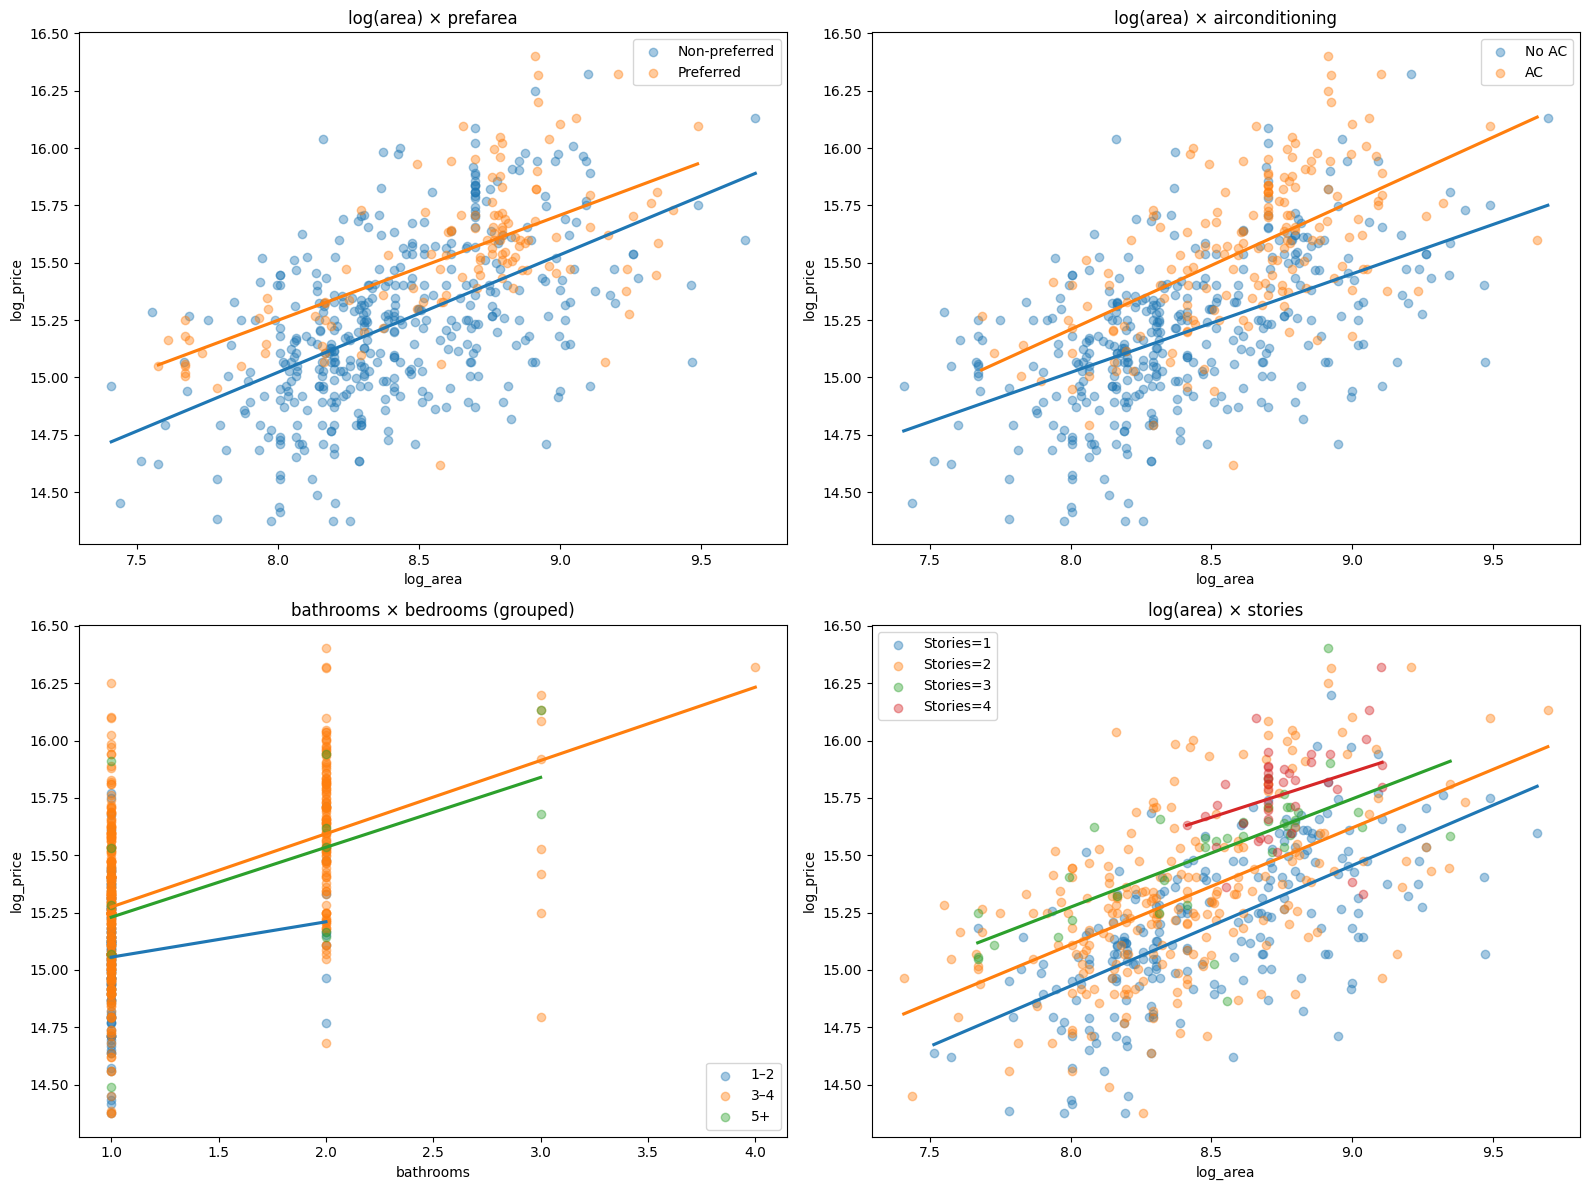

In [54]:

df_plot = df_final.copy()
df_plot['log_price'] = np.log(df_plot['price'])
df_plot['log_area'] = np.log(df_plot['area'])

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. log(area) × prefarea
sns.regplot(
    data=df_plot[df_plot['prefarea_yes'] == 0],
    x='log_area', y='log_price',
    ax=axes[0,0], scatter_kws={'alpha':0.4}, ci=None,
    label='Non-preferred'
)
sns.regplot(
    data=df_plot[df_plot['prefarea_yes'] == 1],
    x='log_area', y='log_price',
    ax=axes[0,0], scatter_kws={'alpha':0.4}, ci=None,
    label='Preferred'
)
axes[0,0].set_title("log(area) × prefarea")
axes[0,0].legend()

# 2. log(area) × airconditioning
sns.regplot(
    data=df_plot[df_plot['airconditioning_yes'] == 0],
    x='log_area', y='log_price',
    ax=axes[0,1], scatter_kws={'alpha':0.4}, ci=None,
    label='No AC'
)
sns.regplot(
    data=df_plot[df_plot['airconditioning_yes'] == 1],
    x='log_area', y='log_price',
    ax=axes[0,1], scatter_kws={'alpha':0.4}, ci=None,
    label='AC'
)
axes[0,1].set_title("log(area) × airconditioning")
axes[0,1].legend()

# 3. bathrooms × bedrooms (collapse bedrooms to groups)
df_plot['bedroom_grp'] = pd.cut(
    df_plot['bedrooms'],
    bins=[0,2,4,10],
    labels=['1–2','3–4','5+']
)

for grp, d in df_plot.groupby('bedroom_grp'):
    sns.regplot(
        data=d,
        x='bathrooms', y='log_price',
        ax=axes[1,0], ci=None,
        scatter_kws={'alpha':0.4},
        label=str(grp)
    )

axes[1,0].set_title("bathrooms × bedrooms (grouped)")
axes[1,0].legend()

# 4. log(area) × stories
for s, d in df_plot.groupby('stories'):
    sns.regplot(
        data=d,
        x='log_area', y='log_price',
        ax=axes[1,1], ci=None,
        scatter_kws={'alpha':0.4},
        label=f"Stories={s}"
    )

axes[1,1].set_title("log(area) × stories")
axes[1,1].legend()

plt.tight_layout()
plt.show()


In [55]:
base_vars = [
    'const',
    'log_area', 'bathrooms', 'bedrooms', 'stories', 'parking',
    'airconditioning_yes', 'hotwaterheating_yes',
    'prefarea_yes', 'mainroad_yes', 'basement_yes',
    'guestroom_yes',
    'furnishingstatus_semi-furnished',
    'furnishingstatus_unfurnished'
]
X= x_train.copy()
X['log_area'] = np.log(X['area'])
X = sm.add_constant(X)
X=X.drop(columns=['area'])
X_base = X[base_vars]
base_model = sm.OLS(np.log(y_train), X_base).fit()

print("Base AIC:", base_model.aic)
print("Base BIC:", base_model.bic)
print(base_model.summary())


Base AIC: -191.40120440277485
Base BIC: -134.31421299588837
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     81.59
Date:                Wed, 18 Feb 2026   Prob (F-statistic):          2.61e-106
Time:                        20:58:37   Log-Likelihood:                 109.70
No. Observations:                 436   AIC:                            -191.4
Df Residuals:                     422   BIC:                            -134.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

In [56]:
df_int = df_final.copy()  # interection data

# log transforms
df_int['log_price'] = np.log(df_int['price'])
df_int['log_area'] = np.log(df_int['area'])

# interaction terms
df_int['log_area_prefarea'] = df_int['log_area'] * df_int['prefarea_yes']
df_int['log_area_ac'] = df_int['log_area'] * df_int['airconditioning_yes']
df_int['bath_bed'] = df_int['bathrooms'] * df_int['bedrooms']
df_int['log_area_stories'] = df_int['log_area'] * df_int['stories']

# response
y = df_int['log_price']

# predictors
X = df_int.drop(columns=['price', 'area', 'log_price'])
X = sm.add_constant(X)


In [57]:
interaction_vars = base_vars + [
    'log_area_prefarea',
    'log_area_ac',
    'bath_bed',
    'log_area_stories'
]

X_int = X[interaction_vars]
interaction_model = sm.OLS(y, X_int).fit()

print("Interaction AIC:", interaction_model.aic)
print("Interaction BIC:", interaction_model.bic)
print(interaction_model.summary())


Interaction AIC: -168.73434867985236
Interaction BIC: -91.32020437591397
                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     75.58
Date:                Wed, 18 Feb 2026   Prob (F-statistic):          4.29e-129
Time:                        20:58:37   Log-Likelihood:                 102.37
No. Observations:                 545   AIC:                            -168.7
Df Residuals:                     527   BIC:                            -91.32
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [58]:
def backward_aic_selection(X, y):
    remaining = list(X.columns)
    current_aic = sm.OLS(y, X[remaining]).fit().aic

    while True:
        aic_candidates = []
        for var in remaining:
            if var == 'const':
                continue
            trial_vars = [v for v in remaining if v != var]
            model = sm.OLS(y, X[trial_vars]).fit()
            aic_candidates.append((model.aic, var))

        best_aic, worst_var = min(aic_candidates)

        if best_aic < current_aic:
            remaining.remove(worst_var)
            current_aic = best_aic
        else:
            break

    return remaining


In [59]:
selected_vars_aic = backward_aic_selection(X_int, y)
selected_vars_aic


['const',
 'log_area',
 'bathrooms',
 'bedrooms',
 'stories',
 'parking',
 'hotwaterheating_yes',
 'mainroad_yes',
 'basement_yes',
 'guestroom_yes',
 'furnishingstatus_unfurnished',
 'log_area_prefarea',
 'log_area_ac']

In [60]:
final_model_aic = sm.OLS(y, X[selected_vars_aic]).fit()
print(final_model_aic.summary())


                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     107.9
Date:                Wed, 18 Feb 2026   Prob (F-statistic):          6.46e-134
Time:                        20:58:37   Log-Likelihood:                 102.04
No. Observations:                 545   AIC:                            -178.1
Df Residuals:                     532   BIC:                            -122.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [61]:
required_features = final_model_aic.model.exog_names
print(required_features)


['const', 'log_area', 'bathrooms', 'bedrooms', 'stories', 'parking', 'hotwaterheating_yes', 'mainroad_yes', 'basement_yes', 'guestroom_yes', 'furnishingstatus_unfurnished', 'log_area_prefarea', 'log_area_ac']


In [62]:

import pickle

with open("model_features.pkl", "wb") as f:
    pickle.dump(required_features, f)


In [63]:
def prepare_input(raw_df, required_features):
    df = raw_df.copy()

    # ---------
    # TRANSFORMS
    # ---------
    df['log_area'] = np.log(df['area'])

    # ---------
    # INTERACTIONS (only those kept in final model)
    # ---------
    if 'log_area_prefarea' in required_features:
        df['log_area_prefarea'] = df['log_area'] * df.get('prefarea_yes', 0)

    if 'log_area_ac' in required_features:
        df['log_area_ac'] = df['log_area'] * df.get('airconditioning_yes', 0)

    if 'bath_bed' in required_features:
        df['bath_bed'] = df.get('bathrooms', 0) * df.get('bedrooms', 0)

    if 'log_area_stories' in required_features:
        df['log_area_stories'] = df['log_area'] * df.get('stories', 0)

    # ---------
    # ADD CONSTANT
    # ---------
    df = sm.add_constant(df, has_constant='add')

    # ---------
    # ALIGN COLUMNS
    # ---------
    df = df.reindex(columns=required_features, fill_value=0)

    return df


In [64]:
# -------------------------------------------------
# 3. Transform TEST data (NO fitting here)
# -------------------------------------------------
X_test_ready = prepare_input(x_test, required_features)

# -------------------------------------------------
# 4. Predict using FINAL AIC model
# -------------------------------------------------
y_test_pred_log = final_model_aic.predict(X_test_ready)
y_test_pred = np.exp(y_test_pred_log)

# -------------------------------------------------
# 5. (Optional) Bias-corrected prediction
# -------------------------------------------------
sigma2 = final_model_aic.mse_resid
y_test_pred_bc = np.exp(y_test_pred_log + 0.5 * sigma2)

# -------------------------------------------------
# 6. Evaluate on TEST data
# -------------------------------------------------
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2 = r2_score(y_test, y_test_pred)

rmse_bc = np.sqrt(mean_squared_error(y_test, y_test_pred_bc))

print("Test RMSE:", rmse)
print("Test R²:", r2)
print("Bias-corrected RMSE:", rmse_bc)

Test RMSE: 1272048.7807028801
Test R²: 0.6798722697240118
Bias-corrected RMSE: 1253176.3128740832


In [65]:
mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
print("MAPE (%):", mape)


MAPE (%): 19.61534913790447


In [66]:
pred = final_model_aic.get_prediction(X_test_ready)
pred_ci = pred.summary_frame(alpha=0.05)

lower = np.exp(pred_ci['mean_ci_lower'])
upper = np.exp(pred_ci['mean_ci_upper'])
# this is confidence interval

